In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
# df = pd.read_csv('/kaggle/input/high_diamond_ranked_10min.csv')
df = pd.read_csv('./sample_data/high_diamond_ranked_10min.csv')

# 캐글 데이터톤 데이터 셋 EDA, 시각화
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min



*   높은 랭크(다이아몬드~마스터)에서의 통계입니다.
*   팀당 19개의 피쳐( 총 38개)가 있습니다.
* blueWins 열이 목표값이고 값이 1이면 파란색 팀이 이겼다는 의미이고 그렇지 않으면 0입니다.

* 10분 전에 게임 내의 어떤 결정이 이기는데 가장 관련 있는지 알아봅니다. 

<br>

---

<Br>

1.   처음에 BlueSide에만 집중을한다.
2.   데이터 세트를 탐색하여 패턴과 상관 관계를 확인한다.
3.   탐색한 후 다시 feature를 재조합 한다.
4.   디시젼 트리를 시각화를 하여 상관 관계를 다시 한번 확인한다.
5. 어떤 feature가 게임을 이기는데 가장 관련 되어있는지 시각화 한다.


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [393]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [394]:
# 결측치 유무
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [395]:
# df.blueWins.map()

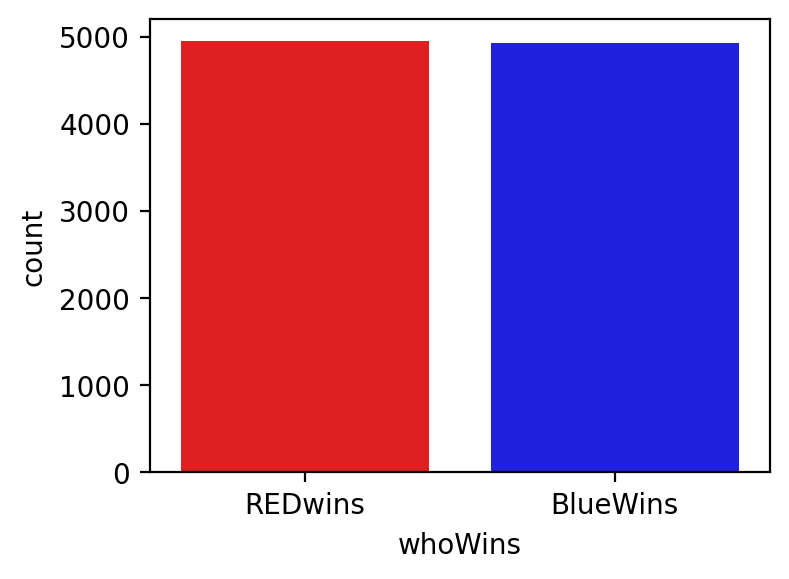

In [396]:
df['whoWins'] = df.blueWins.map({0:"REDwins", 1:"BlueWins"})
palette = ['RED','BLUE']
plt.figure(figsize=(4,3),dpi=200)
sns.countplot(data=df, x='whoWins', palette=palette)

In [397]:
df.whoWins.value_counts()

REDwins     4949
BlueWins    4930
Name: whoWins, dtype: int64

 이 부분에 확인 할수 있는 부분은 레드팀과 블루팀의 결과가 거의 정확히 절반이다. 당연히 블루가 이기면 레드가 졌을테니 블루팀만 보면 레드팀의 결과도 확인할 수있으니 블루팀 feature만 보도록 한다.

In [398]:
# 블루 사이드 관련 컬럼으로만 데이터 만들어놓기
blue_side_columns=[]
for col in df:
  if 'blue' in col:
    blue_side_columns.append(col)

blue_data = df[blue_side_columns]
blue_data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [399]:
describe_blue = blue_data.describe()
describe_blue

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


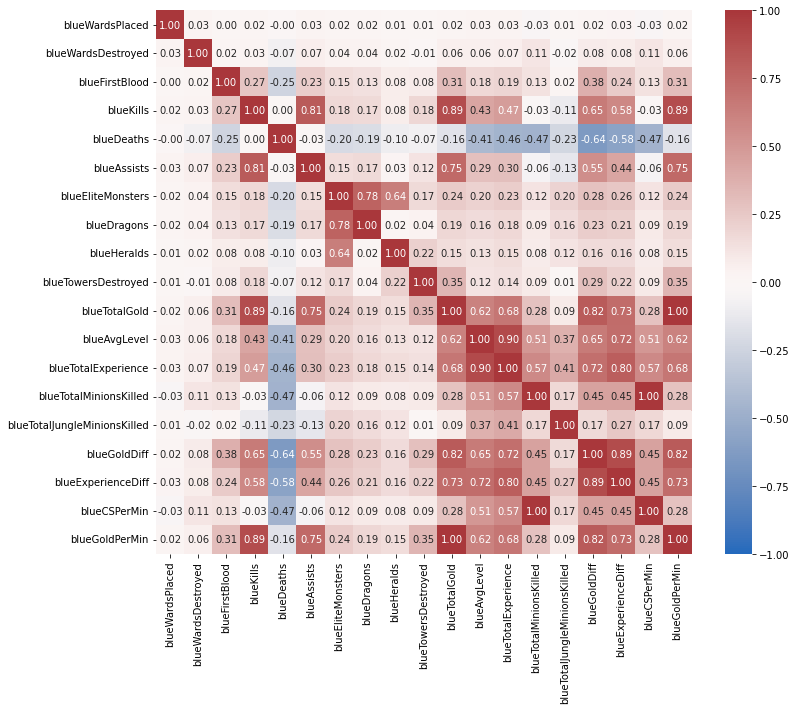

In [400]:
# 블루팀 진영 이긴 특성과의 다른 데이터의 상관관계 분포도
plt.figure(figsize=(12,10))
sns.heatmap(blue_data.drop('blueWins',axis=1).corr(),
            cmap='vlag', annot=True, fmt='.2f', vmin=-1)

In [401]:
blue_data_cleaned = blue_data.copy()

In [402]:
# 킬 어시 의 값 모아주기 
blue_data_cleaned['KA'] = blue_data_cleaned['blueAssists']+blue_data_cleaned['blueKills']
# blue_data_cleaned['KDA'] = blue_data_cleaned['blueAssists']+blue_data_cleaned['blueKills']/blue_data_cleaned['blueDeaths']

# blue_data_cleaned['KDA'].fillna(0)
# blue_data_cleaned['KDA']


blue_data_cleaned = blue_data_cleaned.drop(['blueAssists','blueKills'],axis=1)


In [403]:
blue_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueDeaths                    9879 non-null   int64  
 5   blueEliteMonsters             9879 non-null   int64  
 6   blueDragons                   9879 non-null   int64  
 7   blueHeralds                   9879 non-null   int64  
 8   blueTowersDestroyed           9879 non-null   int64  
 9   blueTotalGold                 9879 non-null   int64  
 10  blueAvgLevel                  9879 non-null   float64
 11  blueTotalExperience           9879 non-null   int64  
 12  blueTotalMinionsKilled        9879 non-null   int64  
 13  blu

# 킬 어시를 모아준 이유 


1.   롤 게임 내에서는 어시스트 란 킬을 했을때 도와준 값을 어시스트라고 한다.
2.   그러므로 킬 어시를 따로두고 봐야할 이유가 없다고 생각해서
하나의 feature로 모아줘도 무방하다고 생각했습니다.



In [404]:
blue_data_cleaned.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,KA
0,0,28,2,1,6,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,20
1,0,12,1,0,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,10
2,0,15,0,0,11,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,11
3,0,43,1,0,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,9
4,0,75,4,0,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,12


In [405]:
Gold = []
for column in list(blue_data_cleaned.columns):
  if 'Gold' in column:
    Gold.append(column)
Gold

['blueTotalGold', 'blueGoldDiff', 'blueGoldPerMin']

In [406]:
blue_data_cleaned = blue_data_cleaned.drop(Gold,axis=1)
blue_data_cleaned.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueDeaths', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueExperienceDiff', 'blueCSPerMin', 'KA'],
      dtype='object')

# 골드의 값을 삭제한 이유


1.   리그오브레전드 에서 골드를 얻는 상황은
* 1초당 1골드, 
* 킬,어시를 한 상황일때, 
* 밑에있는 EliteMonters(Dragon, Herald) 사냥 유무,
* 미니언 처치 시 일 때 골드를 얻는다.


---


2. 위 3개의 features 설명

* 게임 초반 10내의 블루팀 전체 골드(blueTotalGold) 
*   블루팀 기준 레드팀과의 골드차이(blueGoldDiff) 
*   블루팀 기준 10분 얻은 골드량(blueGoldPerMin) (blueTotalGold)와 같은 값입니다.


---



그러므로 위의 3개의 컬럼을 삭제하고 
* 킬 어시(KA)
* 블루팀 총 미니언 처치 수(blueTotalMinionsKilled)
* 블루팀 용 처치 수(blueDragon)
* 블루팀 전령 처치 수(blueHerald)

으로 봐도 무방 하다고 생각했습니다.




In [407]:
blue_data_cleaned = blue_data_cleaned.drop(['blueEliteMonsters'],axis=1)

In [408]:
Experience =[]
for column in list(blue_data_cleaned.columns):
  if 'Experience' in column:
    Experience.append(column)
Experience
blue_data_cleaned = blue_data_cleaned.drop(Experience,axis=1)

In [409]:
blue_data_cleaned = blue_data_cleaned.drop(['blueCSPerMin'],axis=1)

# blueEliteMonsters , blueCSPerMin 삭제 이유


1.   blueEliteMonsters 삭제는 위의 이유와 동일
2.   blueCSPerMin 값은 게임 초반 10분 내의 블루팀 미니언 처치량 값이라 blueGoldPerMin 위의 이유와 동일



In [410]:
# 총 컬럼 과 총 컬럼 수
blue_data_cleaned.columns , blue_data_cleaned.columns.shape

(Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
        'blueDeaths', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
        'blueAvgLevel', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'KA'],
       dtype='object'), (12,))

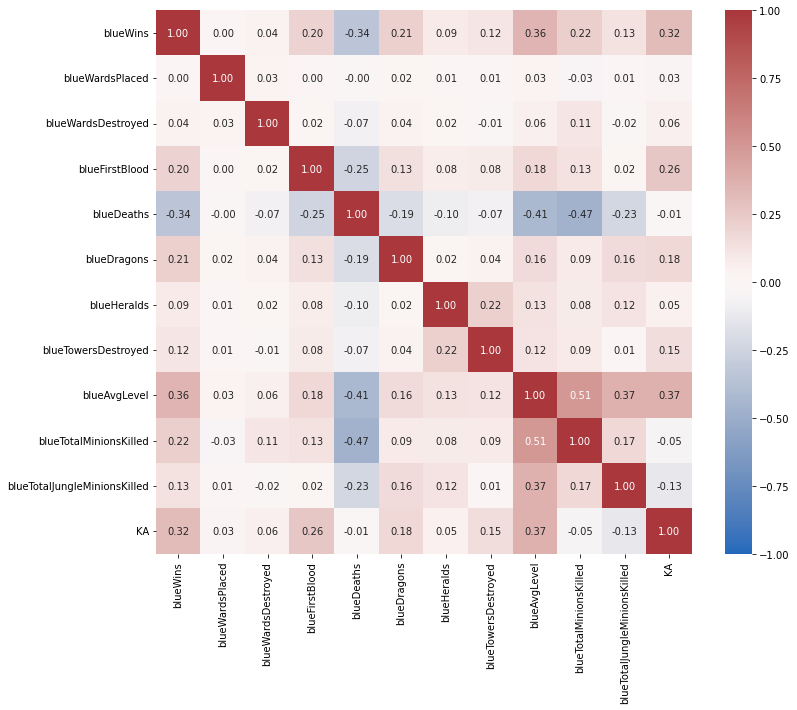

In [411]:
plt.figure(figsize=(12, 10))
# sns.heatmap(blue_data_cleaned.drop("blueWins",axis=1).corr(),cmap='vlag', annot=True, fmt='.2f', vmin=-1)
sns.heatmap(blue_data_cleaned.corr(),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

# 특이치 확인 및 삭제

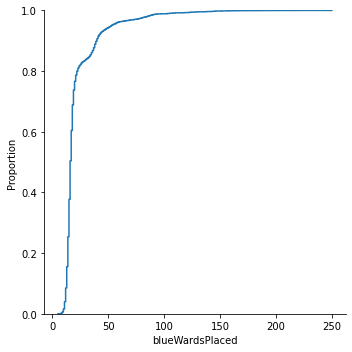

In [412]:
# 특이치 확인
blue_no_outliers = blue_data_cleaned.copy()

sns.displot(blue_no_outliers['blueWardsPlaced'],kind="ecdf")

In [413]:
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsPlaced']
                                        <= np.quantile(blue_no_outliers['blueWardsPlaced']
                                                      ,q=0.99)]
print('삭제 {}'.format(df.shape[0]-blue_no_outliers.shape[0]))

삭제 93


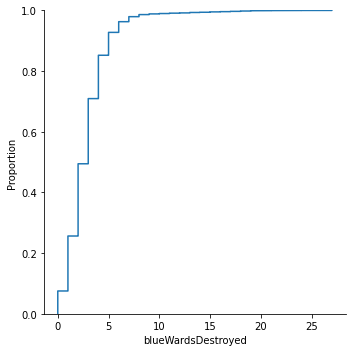

In [414]:
sns.displot(blue_no_outliers['blueWardsDestroyed'],kind='ecdf')

In [415]:
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] 
                                        <= np.quantile(blue_no_outliers['blueWardsDestroyed']
                                                       ,q=0.99)]
print('삭제 {}'.format(df.shape[0]-blue_no_outliers.shape[0]))

삭제 182


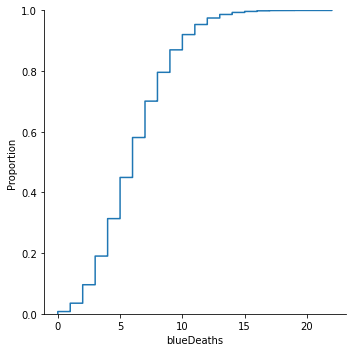

In [416]:
sns.displot(blue_no_outliers['blueDeaths'],kind='ecdf')

In [417]:
blue_data_scaled = blue_no_outliers.copy()

blue_target = blue_no_outliers['blueWins'] #target
blue_features = blue_no_outliers.drop(['blueWins'],axis=1) # features

In [418]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(blue_features)

blue_features_scaled = scaler.transform(blue_features)

In [419]:
blue_features_scaled.mean(axis=0)
blue_features_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [420]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(blue_features_scaled,blue_target, random_state=42, test_size=0.10)

logReg = LogisticRegression()
logReg.fit(blue_features_scaled,blue_target)

logReg.score(blue_features_scaled,blue_target)

0.7146540167061978

In [421]:
blue_weights = pd.DataFrame()
blue_weights['Features'] = blue_features.columns
blue_weights['Weights'] = logReg.coef_.reshape(11,1)

In [422]:
blue_weights.sort_values(by='Weights',ascending=False)

,Features,Weights
10,KA,0.691570
7,blueAvgLevel,0.256356
4,blueDragons,0.228247
8,blueTotalMinionsKilled,0.155383
9,blueTotalJungleMinionsKilled,0.139077
6,blueTowersDestroyed,0.123222
2,blueFirstBlood,0.083533
5,blueHeralds,0.050115
1,blueWardsDestroyed,0.016395
0,blueWardsPlaced,-0.049253


In [423]:
blue_data_cleaned.columns[1:]

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueDeaths',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'KA'],
      dtype='object')

In [424]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

using_cols = blue_data_cleaned.columns[1:]

X = blue_data_cleaned[using_cols]# columns
y = blue_data_cleaned['blueWins'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [425]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2,
                             max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6973684210526315


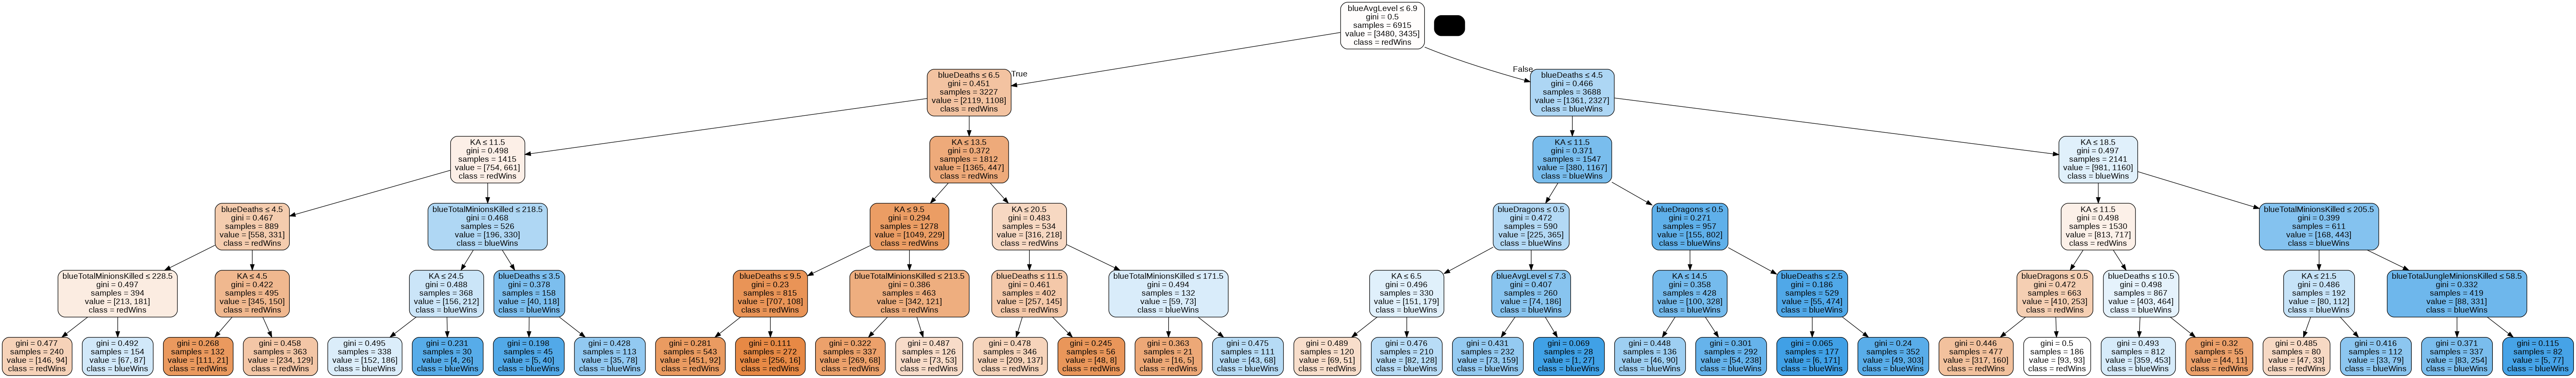

In [426]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=using_cols, 
                class_names=['redWins','blueWins']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('row_df.png')
Image(graph.create_png(), retina=True)

<Figure size 1080x1080 with 0 Axes>

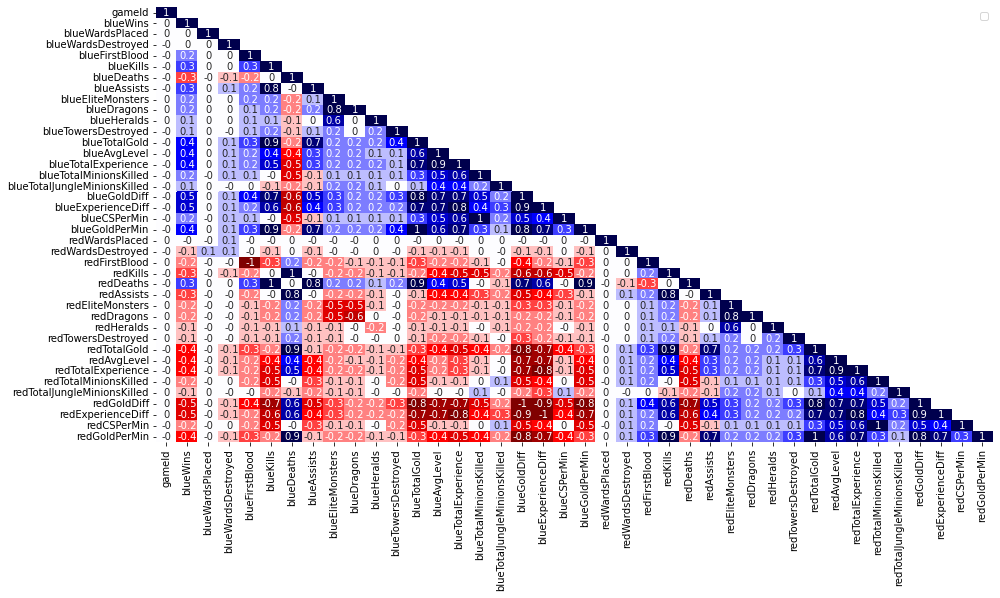

In [427]:
plt.figure(figsize=(15,15))
corrmat = df.corr()
corrmat = np.tril(corrmat)
corrmat[corrmat==0] = None
corrmat = corrmat.round(1)
labels = df.select_dtypes(include='number').columns.values
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.legend('')

plt.show()